# Selenium 2

- 스크래핑
    - G마켓 베스트 상품 데이터
- 이미지 크롤링
    - 유투브 영상 이미지 크롤링
    - 이미지 전처리(사이즈 축소, 특정영역 이미지 자르기)    
- 파일 다운로드
    - 유투브 동영상 다운로드
- Header 설정

패키지 import

In [1]:
import requests
from selenium import webdriver
import time

## 1. Scraping
- G마켓 베스트 셀러 페이지 크롤링
- 크롤링한 데이터를 전처리 (원가 데이터가 없는 경우 판매가를 넣음)
- 할인율을 계산한 컬럼을 추가
- 할인율이 50%이상인 상품만 필터링

웹드라이버 실행 및 페이지 이동

In [2]:
driver = webdriver.Chrome()
url = "http://corners.gmarket.co.kr/Bestsellers"
driver.get(url)

아이템 엘리먼트들 선택

In [3]:
items = driver.find_elements_by_css_selector(
    ".best-list:nth-child(3) > ul > li")
len(items)

제목 링크 원가, 판매가 텍스트 데이터를 크롤링

In [4]:
dict_list = []
for item in items:
    title = item.find_element_by_css_selector(".itemname").text
    link = item.find_element_by_css_selector(".itemname").get_attribute("href")
    o_price = item.find_element_by_css_selector(".o-price").text[:-1]
    s_price = item.find_element_by_css_selector(
        ".s-price").text.split(" ")[0][:-1]

    data = {
        "title": title,
        "link": link,
        "o_price": o_price,
        "s_price": s_price,
    }

    dict_list.append(data)

In [5]:
# 브라우져 닫기
driver.quit()

데이터 프레임으로 만들기

In [6]:
df = pd.DataFrame(dict_list)
df.tail()

link o_price s_price  \
195  http://item.gmarket.co.kr/Item?goodscode=15813...  59,800  19,900   
196  http://item.gmarket.co.kr/Item?goodscode=12595...  39,800  19,800   
197  http://item.gmarket.co.kr/Item?goodscode=15826...   4,800   3,360   
198  http://item.gmarket.co.kr/Item?goodscode=27699...  34,000  10,500   
199  http://item.gmarket.co.kr/Item?goodscode=94796...  36,000  12,900   

                                      title  
195                    [키퍼]폴딩박스 45L(특대) 1+1  
196               남성용 인조가죽자켓 가디건 스티치 블루종 자켓  
197        [GS25](GS25) 황금왕돈까스도시락(주문도시락 전용)  
198  [에이지투웨니스]에이지투웨니스 올뉴 에센스커버팩트XP 시즌11 견미리  
199     [세이프레스트]세이프레스트 침대커버 방수 매트리스커버 진드기차단

값이 없는 o_price를 s_price로 넣기

In [7]:
nodata_indexs = df["o_price"] == ""

In [8]:
df["o_price"][nodata_indexs].tail()

181    
184    
186    
192    
194    
Name: o_price, dtype: object

In [9]:
df["s_price"][nodata_indexs].tail()

181    27,000
184    31,900
186    18,500
192    53,500
194    52,500
Name: s_price, dtype: object

In [10]:
df[nodata_indexs].tail()

link o_price s_price  \
181  http://item.gmarket.co.kr/Item?goodscode=15510...          27,000   
184  http://item.gmarket.co.kr/Item?goodscode=70132...          31,900   
186  http://item.gmarket.co.kr/Item?goodscode=15623...          18,500   
192  http://item.gmarket.co.kr/Item?goodscode=15403...          53,500   
194  http://item.gmarket.co.kr/Item?goodscode=70450...          52,500   

                                            title  
181              [샤오미]샤오미 미밴드3 아이폰 안드로이드 한글 완벽지원/  
184              [홈플러스](행사상품)이천남부_임금님표 이천쌀_10KG 포  
186  [동원에프앤비]통그릴윈너 300gx4+후랑크소시지300gx2+쿨피스450mlx2  
192             [앱솔루트명작]매일 앱솔루트 명작 분유 3단계 800g 3캔  
194                   18년 햅쌀 다시농협 나주쌀 20kg / 당일도정

값이 없는 o_price를 s_price로 넣기

In [11]:
df["o_price"][nodata_indexs] = df["s_price"][nodata_indexs]

In [12]:
df.loc[nodata_indexs].tail()

link o_price s_price  \
181  http://item.gmarket.co.kr/Item?goodscode=15510...  27,000  27,000   
184  http://item.gmarket.co.kr/Item?goodscode=70132...  31,900  31,900   
186  http://item.gmarket.co.kr/Item?goodscode=15623...  18,500  18,500   
192  http://item.gmarket.co.kr/Item?goodscode=15403...  53,500  53,500   
194  http://item.gmarket.co.kr/Item?goodscode=70450...  52,500  52,500   

                                            title  
181              [샤오미]샤오미 미밴드3 아이폰 안드로이드 한글 완벽지원/  
184              [홈플러스](행사상품)이천남부_임금님표 이천쌀_10KG 포  
186  [동원에프앤비]통그릴윈너 300gx4+후랑크소시지300gx2+쿨피스450mlx2  
192             [앱솔루트명작]매일 앱솔루트 명작 분유 3단계 800g 3캔  
194                   18년 햅쌀 다시농협 나주쌀 20kg / 당일도정

In [13]:
df.tail()

link o_price s_price  \
195  http://item.gmarket.co.kr/Item?goodscode=15813...  59,800  19,900   
196  http://item.gmarket.co.kr/Item?goodscode=12595...  39,800  19,800   
197  http://item.gmarket.co.kr/Item?goodscode=15826...   4,800   3,360   
198  http://item.gmarket.co.kr/Item?goodscode=27699...  34,000  10,500   
199  http://item.gmarket.co.kr/Item?goodscode=94796...  36,000  12,900   

                                      title  
195                    [키퍼]폴딩박스 45L(특대) 1+1  
196               남성용 인조가죽자켓 가디건 스티치 블루종 자켓  
197        [GS25](GS25) 황금왕돈까스도시락(주문도시락 전용)  
198  [에이지투웨니스]에이지투웨니스 올뉴 에센스커버팩트XP 시즌11 견미리  
199     [세이프레스트]세이프레스트 침대커버 방수 매트리스커버 진드기차단

할인률 계산해서 컬럼에 추가하기

In [14]:
df["o_price"] = df["o_price"].apply(
    lambda price: price.replace(",", "")).astype("int")

In [15]:
df["s_price"] = df["s_price"].apply(
    lambda price: price.replace(",", "")).astype("int")

In [16]:
df["sale_rate"] = round((1 - df["s_price"] / df["o_price"]) * 100, 2)

In [17]:
df.tail()

link  o_price  s_price  \
195  http://item.gmarket.co.kr/Item?goodscode=15813...    59800    19900   
196  http://item.gmarket.co.kr/Item?goodscode=12595...    39800    19800   
197  http://item.gmarket.co.kr/Item?goodscode=15826...     4800     3360   
198  http://item.gmarket.co.kr/Item?goodscode=27699...    34000    10500   
199  http://item.gmarket.co.kr/Item?goodscode=94796...    36000    12900   

                                      title  sale_rate  
195                    [키퍼]폴딩박스 45L(특대) 1+1      66.72  
196               남성용 인조가죽자켓 가디건 스티치 블루종 자켓      50.25  
197        [GS25](GS25) 황금왕돈까스도시락(주문도시락 전용)      30.00  
198  [에이지투웨니스]에이지투웨니스 올뉴 에센스커버팩트XP 시즌11 견미리      69.12  
199     [세이프레스트]세이프레스트 침대커버 방수 매트리스커버 진드기차단      64.17

할인율이 50% 이상인 상품만 필터링

In [18]:
df[df["sale_rate"] > 50].sort_values(
    "sale_rate", ascending=False).reset_index(drop=True).head()

link  o_price  s_price  \
0  http://item.gmarket.co.kr/Item?goodscode=39948...    53000    15900   
1  http://item.gmarket.co.kr/Item?goodscode=14629...    23000     6900   
2  http://item.gmarket.co.kr/Item?goodscode=79841...    23000     6900   
3  http://item.gmarket.co.kr/Item?goodscode=80917...    33000     9900   
4  http://item.gmarket.co.kr/Item?goodscode=14839...    33000     9900   

                                  title  sale_rate  
0    [젤리스푼]아동복/여름오픈/티셔츠/상하복/레깅스/팬츠/신학기룩       70.0  
1         [가나양말]남자 여자 발목양말 덧신 페이크삭스 봄양말       70.0  
2      [투투삭스]봄신상 균일가 패션양말/학생/스니커즈/중목/골지       70.0  
3  [페이퍼플레인]스니커즈 봄신발 커플신발 슬립온 키높이 운동화 단화       70.0  
4        1+1 워터프루프 펜 아이이라이너 번짐없이 깔끔 마무리       70.0

### 2. Image Scraping
- Install pillow
    - 파이썬에서 사용되는 이미지 처리 패키지
    - Python pip
        - `$ pip install pillow`
    - Anaconda
        - `$ conda install -c anaconda pillow`

In [19]:
from PIL import Image as pil

- 유투브의 특정 시간대의 영상을 이미지로 저장
    - 유투브 특정 시간대의 페이지를 스크린샷으로 저장
    - 영상 부분에 해당되는 좌표값을 계산
    - 계산된 좌표값으로 pillow를 이용하여 영상 부분만 계산하여 잘라내기
    - 하단의 재생영역을 계산하여 잘라내기
    - 크기가 작은 썸네일로 만들어 저장하기

한장의 이미지 스크린샷

In [20]:
!mkdir datas

mkdir: datas: File exists


In [21]:
# 브라우져 열고 크롤링할 페이지로 이동
url = "https://www.youtube.com/watch?v=wFTmQ27S7OQ&t=1300s"
driver = webdriver.Chrome()
driver.get(url)

# 화면 렌더링 시간 기다림
time.sleep(1)

# 화면 이미지 저장
driver.save_screenshot("./datas/screenshot.png")

# 브라우져 닫기
driver.quit()

여러장의 이미지 스크린샷

In [22]:
def youtube_images(site_url, start=0, end=50, term=10):

    urls = []

    for second in range(start, end + 1, term):

        # URL 만들기
        url = "{}&t={}s".format(site_url, second)
        urls.append(url)

    # 브라우져 열고 크롤링할 페이지로 이동
    driver = webdriver.Chrome()
    for idx, url in enumerate(urls):

        # 저장할 페이지로 이동
        driver.get(url)

        time.sleep(1)

        # 이미지 저장
        driver.save_screenshot("./datas/screenshot_{}.png".format(idx))

    # 브라우져 종료
    driver.quit()

In [23]:
youtube_images('https://www.youtube.com/watch?v=wFTmQ27S7OQ',
               start=1000, end=1300, term=100)

In [24]:
!ls datas

iPad Pro — Change — Apple.mp4     screenshot_4.png
screenshot.png                    screenshot_5.png
screenshot_0.png                  screenshot_element.png
screenshot_1.png                  screenshot_element2.png
screenshot_2.png                  thumnail.png
screenshot_3.png


이미지 주피터 노트북에 띄우기

(2400, 1420)


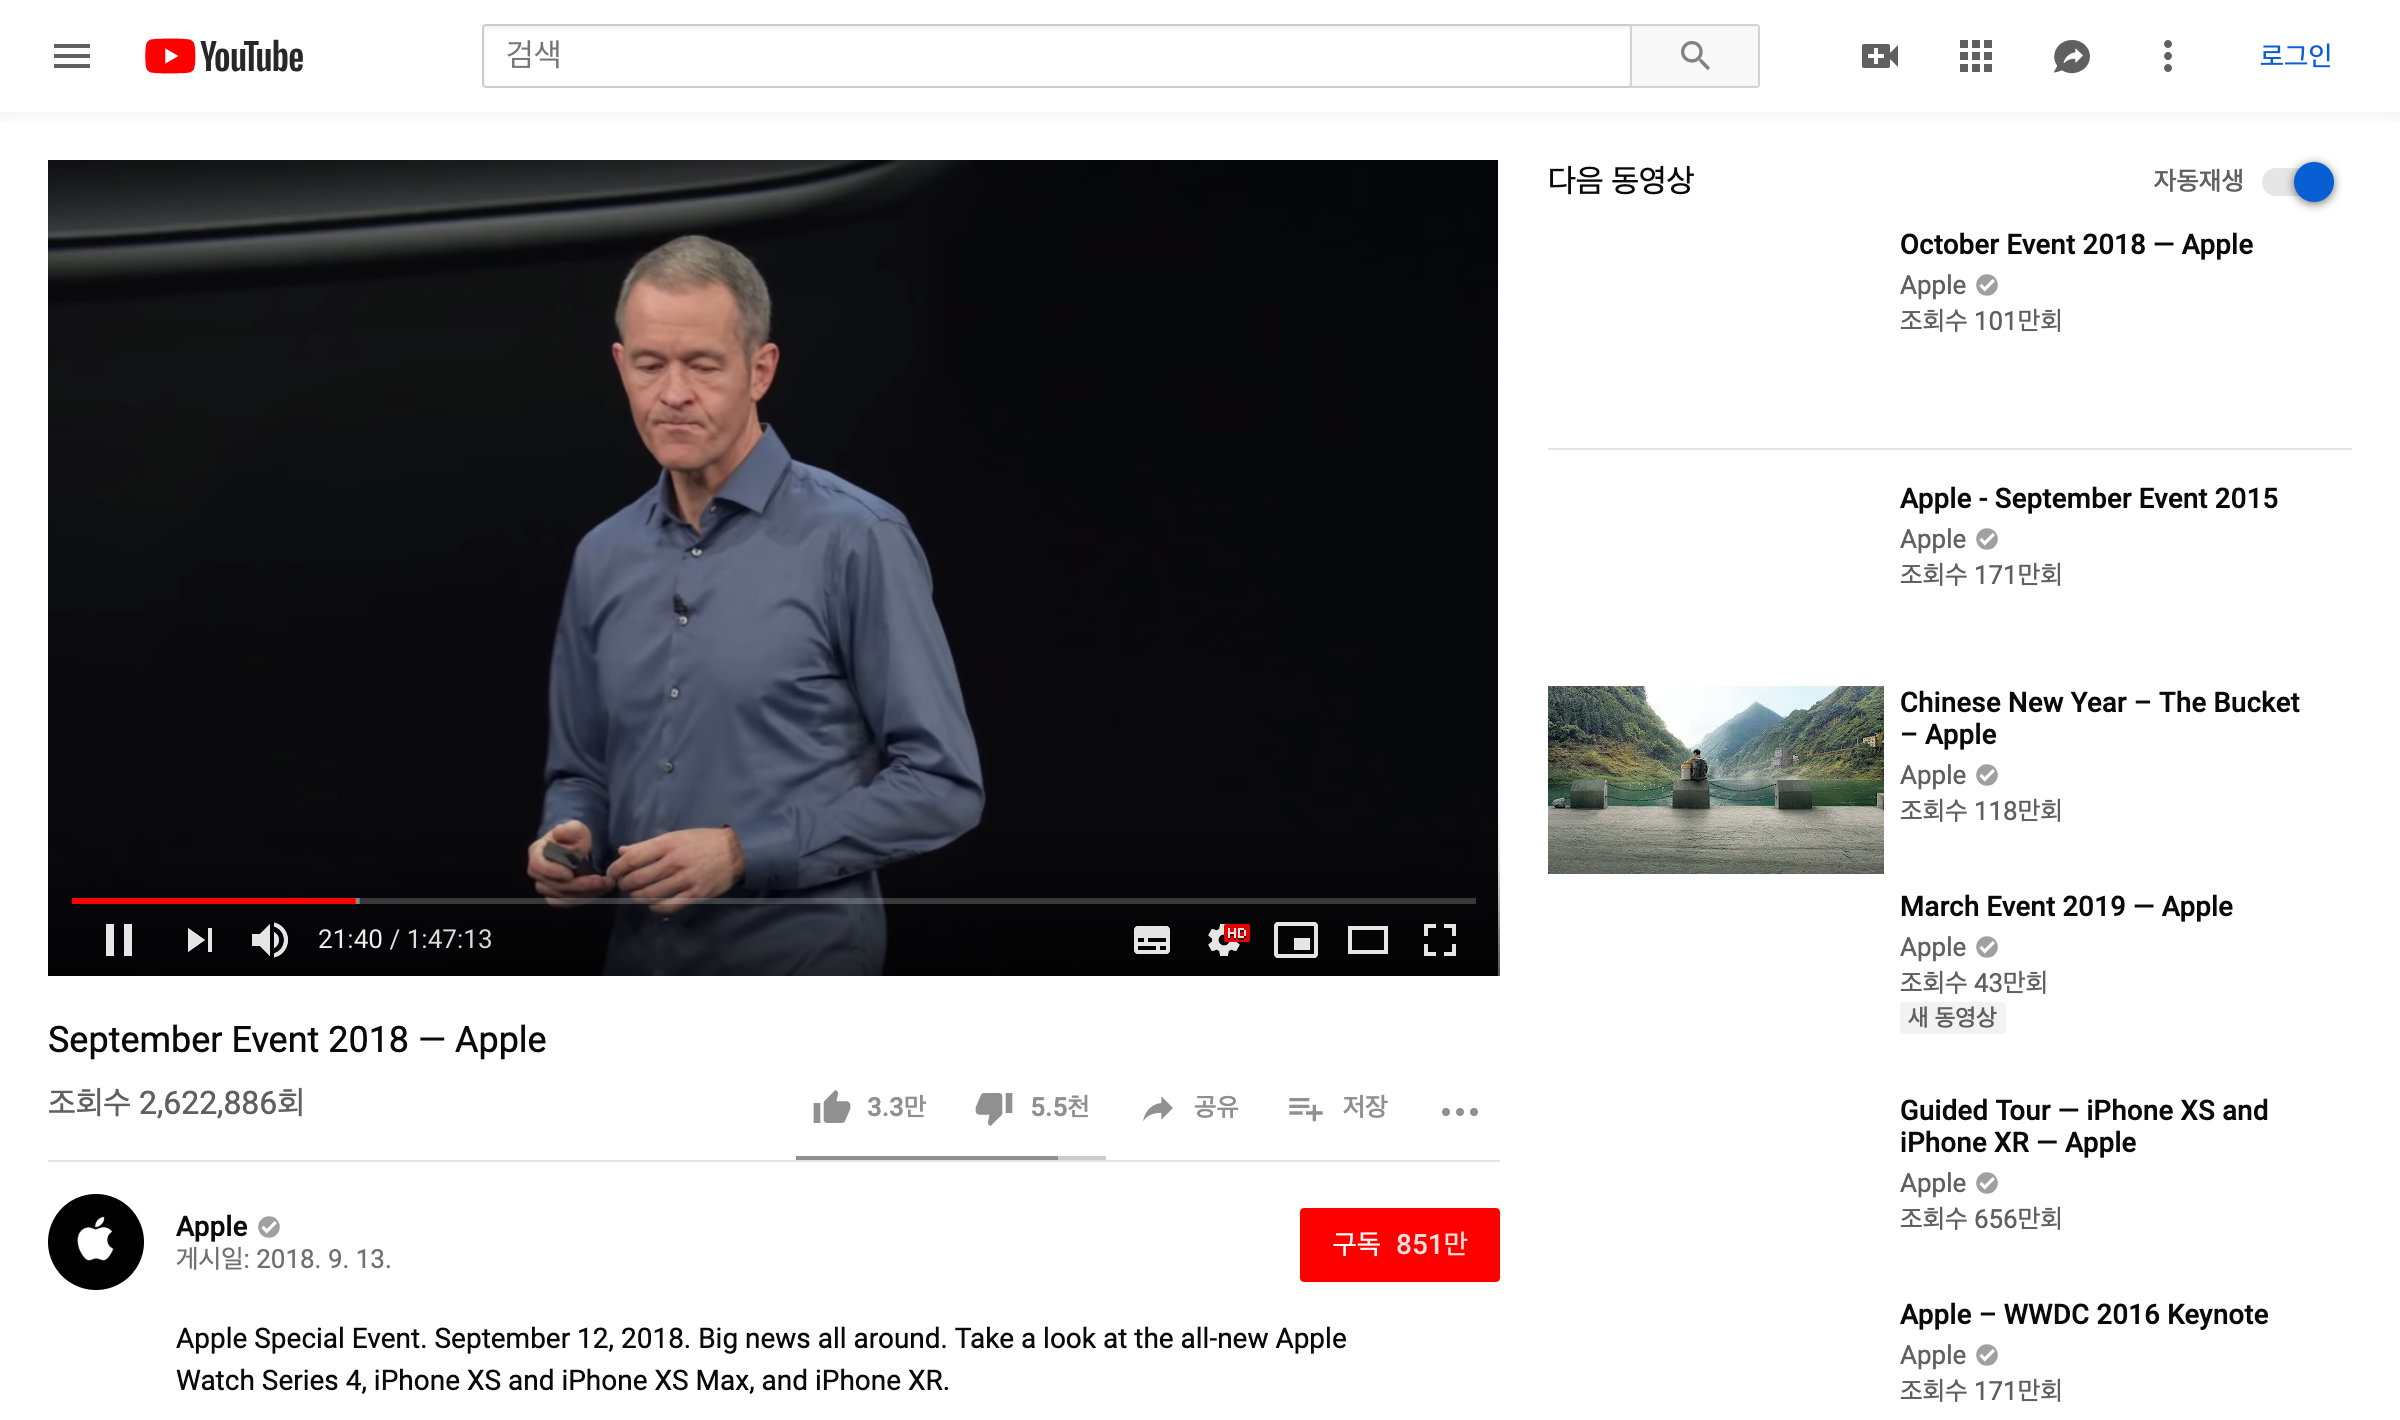

In [25]:
pli_img = pil.open("./datas/screenshot.png")
print(pli_img.size)
pli_img

동영상 영역의 엘리먼트의 사이즈 구하기

In [26]:
url = "https://www.youtube.com/watch?v=wFTmQ27S7OQ&t=1300s"
driver = webdriver.Chrome()
driver.get(url)

In [27]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 408, 'width': 726}


In [28]:
# area 변경
# 화면의 해상도에 따라서 비율이 달라질수 있습니다.
left = location["x"] * 2
top = location["y"] * 2
right = left + size["width"] * 2
bottom = top + size["height"] * 2
area = (left, top, right, bottom)
area

(48, 160, 1500, 976)

이미지 잘라주기

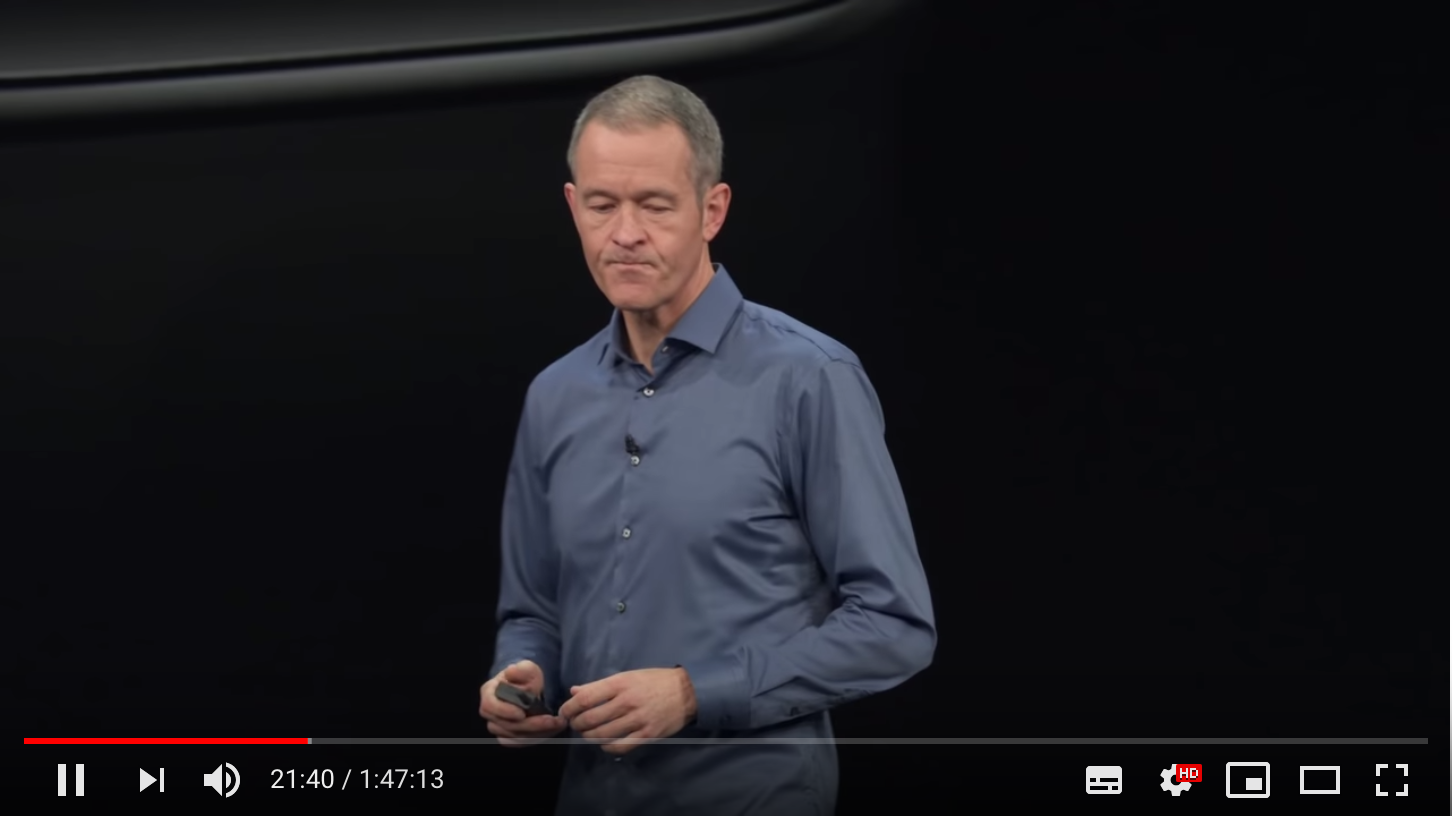

In [29]:
pil_img = pil.open("./datas/screenshot.png")
pil_img = pil_img.crop(area)
pil_img

자른 이미지를 저장

(1452, 816)


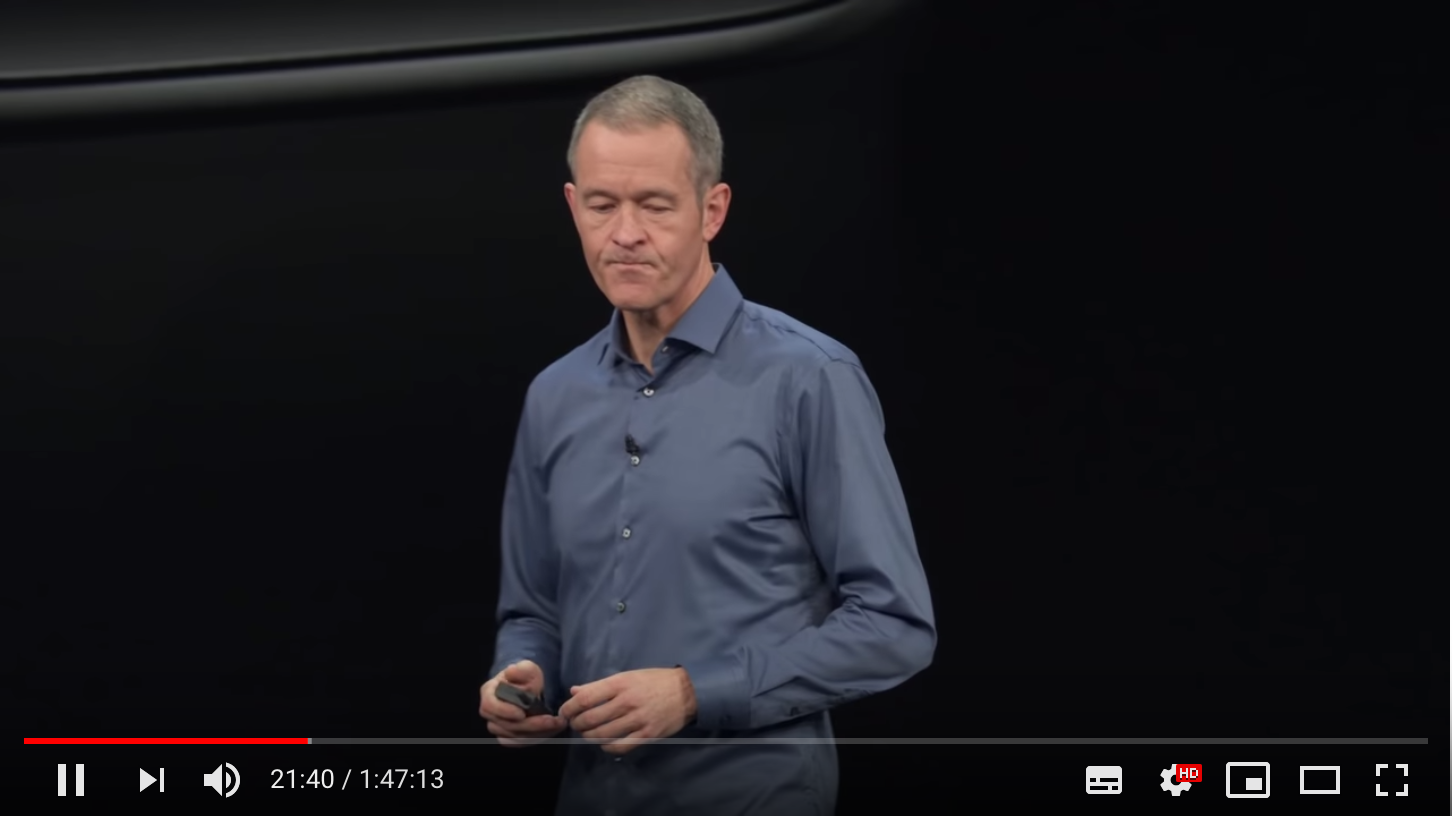

In [30]:
pil_img.save("./datas/screenshot_element.png")
pil_img = pil.open("./datas/screenshot_element.png")
print(pil_img.size)
pil_img

하단의 재생영역 자르기

In [31]:
# 재생영역의 height 구하기
url = "https://www.youtube.com/watch?v=wFTmQ27S7OQ&t=1300s"
driver = webdriver.Chrome()
driver.get(url)

In [32]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
height = element.size["height"]
driver.quit()
height

39

In [33]:
left = location["x"] * 2
top = location["y"] * 2
right = left + size["width"] * 2
bottom = top + size["height"] * 2 - height * 2
area = (left, top, right, bottom)
area

(48, 160, 1500, 898)

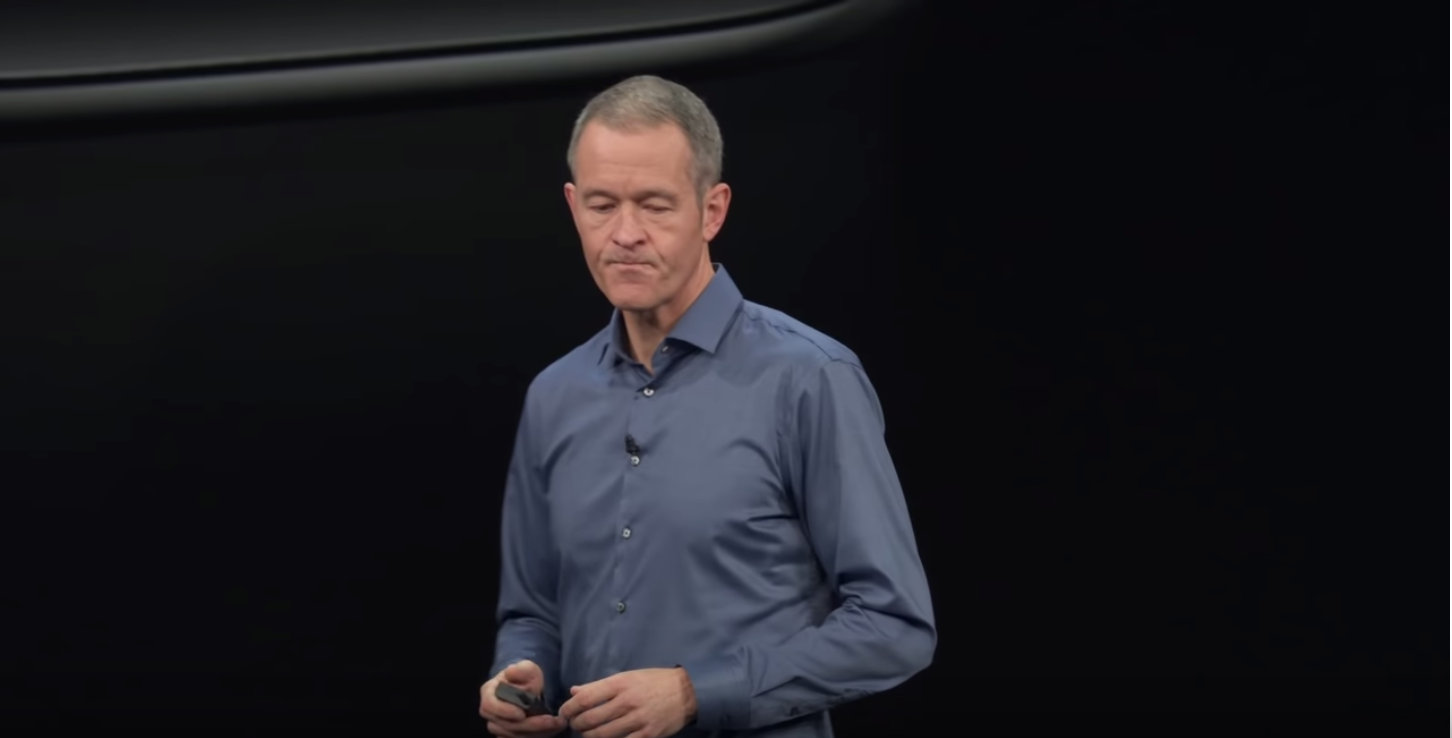

In [34]:
# 이미지 잘라주기
pil_img = pil.open("./datas/screenshot.png")
pil_img = pil_img.crop(area)
pil_img

자른 이미지를 저장

(1452, 738)


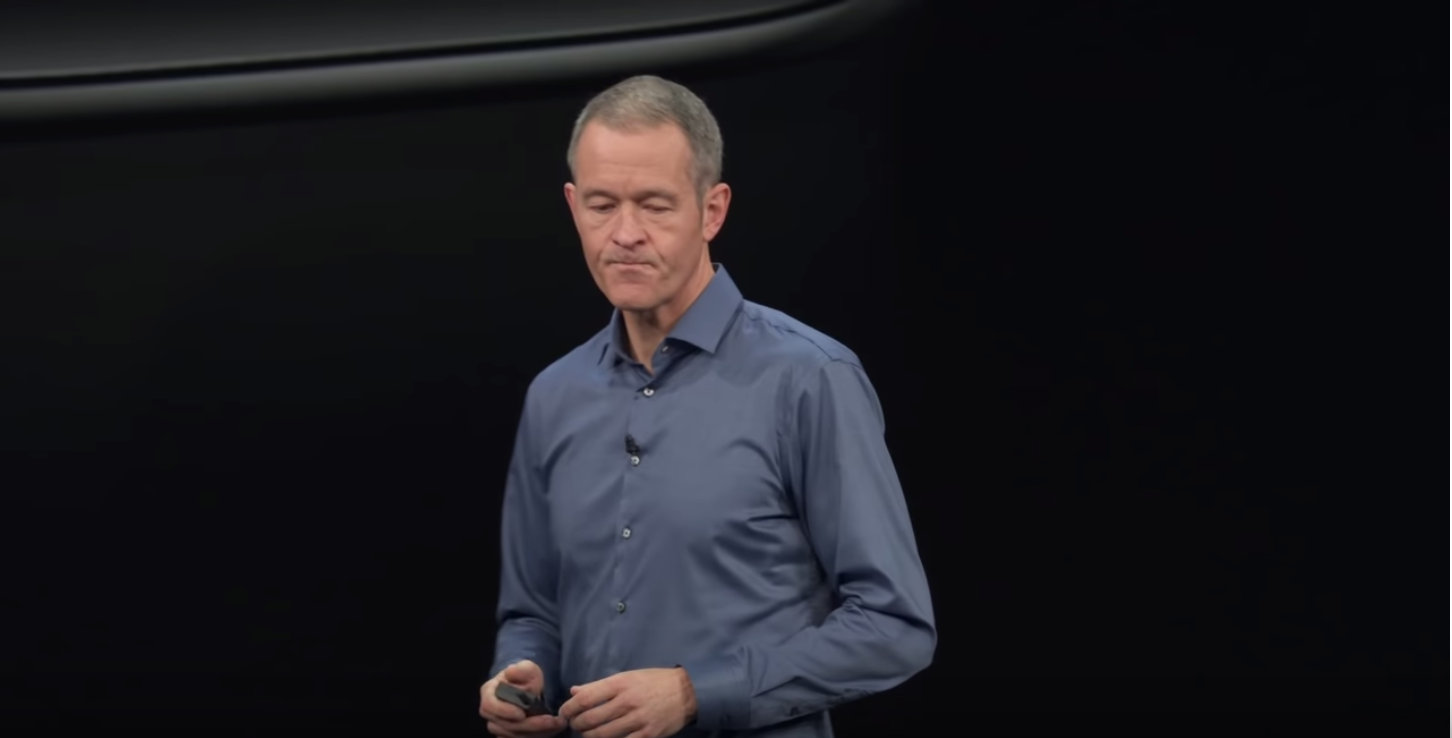

In [35]:
pil_img.save("./datas/screenshot_element2.png")
pil_img = pil.open("./datas/screenshot_element2.png")
print(pil_img.size)
pil_img

썸네일 만들기
- 썸네일 : 원본 이미지를 다양한 사이즈의 이미지로 처리해준 파일
- 비율로 줄어듭니다.

In [36]:
pil_img = pil.open("./datas/screenshot_element2.png")
pil_img.size

(1452, 738)

In [37]:
pil_img.thumbnail((320, 160))
pil_img.size

(316, 160)

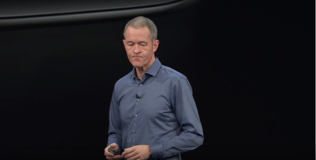

In [38]:
pil_img

썸네일 저장

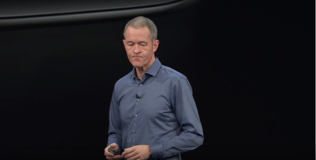

In [39]:
pil_img.save("./datas/thumnail.png")
pil.open("./datas/thumnail.png")

## 3.6 Header 설정
- fake agent 사용

In [40]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'

In [41]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'

In [42]:
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'

#### install fake useragent
- `$ pip install fake-useragent`

In [43]:
from fake_useragent import UserAgent

UserAgent를 변경하여 드라이버의 Agent 확인

In [44]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.57 Safari/537.36'

In [45]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1464.0 Safari/537.36'

In [46]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent")
driver.quit()
agent

'Mozilla/5.0 (Windows NT 6.4; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2225.0 Safari/537.36'

### 파일 다운로드
- requests 모듈을 이용해서 파일을 다운로드 할수 있습니다.
- 다운로드 URL을 사용
- youtube 영상의 url에서 www.을 ss로 변경하면 다운로드 사이트로 이동 됩니다.
- 해당 사이트에서 다운로드 버튼의 href 속성 값으로 다운로드 링크를 얻음
- 다운로드 링크를 이용하여 파일을 다운

In [47]:
# iter_content 함수로 저장
def download(title, link):

    # requests를 이용하여 response를 받음
    response = requests.get(link, stream=True)

    # 저장할 파일의 경로와 파일 사이즈 초기값을 정함
    save_path, size = "./datas/{}".format(title), 0

    # 파일 저장 : wb(write binary)
    with open(save_path, 'wb') as f:
        # chunk_size : byte
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)

    return size

In [48]:
# 다운로드 URL
href = "https://r1---sn-o5035oxu-n8vl.googlevideo.com/videoplayback?nh=%2CIgpwcjAxLnN2bzAzKgkxMjcuMC4wLjE&ratebypass=yes&fvip=15&c=WEB&source=youtube&signature=C9BC589B9551CFC0E70D134FBC00504365BFA988.CF29416FE875CEECA1468C2E88DB49E23221B3D6&mv=m&lmt=1541639354005414&ipbits=0&ms=au%2Crdu&requiressl=yes&mt=1548768216&pl=23&itag=22&id=o-ALIywWtSCEo2_POnzoIqscG5iCbjsch8vuk_rwTsX5rl&dur=63.297&mime=video%2Fmp4&sparams=dur%2Cei%2Cid%2Cinitcwndbps%2Cip%2Cipbits%2Citag%2Clmt%2Cmime%2Cmm%2Cmn%2Cms%2Cmv%2Cnh%2Cpl%2Cratebypass%2Crequiressl%2Csource%2Cexpire&mm=31%2C29&ip=85.91.119.6&mn=sn-o5035oxu-n8vl%2Csn-n8v7znly&ei=KVRQXPi3IJ3X7gSRhq-gBA&key=yt6&txp=5531432&initcwndbps=933750&expire=1548789897&video_id=LjaKHqDbzSA&title=iPad+Pro+%E2%80%94+Change+%E2%80%94+Apple"

In [49]:
title = "iPad Pro — Change — Apple.mp4"
size = download(title, href)
print("file size : {}Mb".format(round(size/1024/1024), 2))

file size : 0Mb
